# Feature Engineering
# Klassifikation
# Regression
# Validierung und mehr
## Sampling und Resampling
## Validierungstechniken
## Grid Search und Random Search
## Performancemetriken
### Klassifikation
#### Einführung und Vorbereitung

In [2]:
## import libraries
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt; sns.set()
%matplotlib inline

## load data
datapath = '../3_data'
from os import chdir; chdir(datapath)
from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data('bank_data_prep.csv', 'y', seed = 1234)

In [3]:
## create different types of predictions
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train) 

## predictions: using .predict() and .predict_proba()
y_pred_c = model.predict(X_test)
y_pred_n = np.where(y_pred_c == 'yes', 1, 0)
y_pred_p = model.predict_proba(X_test)

In [4]:
## comparison of y_pred_c, y_pred_n and y_pred_p
pred_df = pd.DataFrame({
    'y_pred_c': y_pred_c,
    'y_pred_n' : y_pred_n,
    'y_pred_p_0': y_pred_p[:,0],
    'y_pred_p_1': y_pred_p[:,1]
})
print(pred_df.head())

  y_pred_c  y_pred_n  y_pred_p_0  y_pred_p_1
0      yes         1        0.08        0.92
1      yes         1        0.22        0.78
2      yes         1        0.36        0.64
3       no         0        0.99        0.01
4       no         0        0.99        0.01


In [5]:
## for later use: the same with y_test
y_test_n = np.where(y_test == 'yes', 1, 0)

In [6]:
## check
print(pd.DataFrame({
    'y_test': y_test,
    'y_test_n': y_test_n
}).head())

     y_test  y_test_n
2809    yes         1
4052    yes         1
658     yes         1
786      no         0
6675     no         0


#### Metriken für nicht numerische Klassen

In [8]:
## example of a multi class classification
iris_data = sns.load_dataset('iris')
print(iris_data.info())
iris_X = iris_data.drop('species', axis=1)
iris_y = iris_data['species']
#print(iris_X)
#print(iris_y)

## test - train - split
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test, = train_test_split(
    iris_X,
    iris_y,
    train_size=2/3,
    random_state=1234)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
from sklearn.tree import DecisionTreeClassifier
iris_model = DecisionTreeClassifier(random_state=1234)
iris_model.fit(iris_X_train, iris_y_train)
iris_y_pred = iris_model.predict(iris_X_test)

In [10]:
## confusion matrix
#print(pd.crosstab(iris_y_pred, iris_y_test))
pd.crosstab(iris_y_pred, iris_y_test).style.background_gradient(axis=None) ## for all cells

species,setosa,versicolor,virginica
row_0,,,
setosa,17,0,0
versicolor,0,16,0
virginica,0,1,16


In [11]:
## accuracy aus confusion matrix
print(np.diag(pd.crosstab(iris_y_test, iris_y_pred)).sum() / iris_y_test.size)

## accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score
print(accuracy_score(iris_y_pred, iris_y_test))

## model internal scorer
print(iris_model.score(iris_X_test, iris_y_test))

0.98
0.98
0.98


In [12]:
## classification error, calculated as 1 - accuracy_score)
print(1 - accuracy_score(iris_y_pred, iris_y_test))

0.020000000000000018


In [13]:
## other multiclass scorer: balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(iris_y_test, iris_y_pred))

0.9803921568627452


In [14]:
## other multiclass scorer: cohen_kappa_score
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(iris_y_test, iris_y_pred))

0.97000599880024


#### Metriken für binär numerische Klassen

In [16]:
## confusion matrix of numerical targets
print(pd.crosstab(y_pred_n, y_test_n)) ## confusion matrix
print()
print(pd.crosstab(y_pred_n, y_test_n).\
      reindex(columns=[1, 0], index=[1, 0])) ## reindexed

col_0     0     1
row_0            
0      1465   141
1       270  1411

col_0     1     0
row_0            
1      1411   270
0       141  1465


In [17]:
## extract confusion matrix cells
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_n, y_pred_n).ravel() ## .ravel() in order to flatten array
print('tp =', tp)
print('fn =', fn)
print('fp =', fp)
print('tn =', tn)

tp = 1411
fn = 141
fp = 270
tn = 1465


In [18]:
## precision - positive predictive value - PPV
ppv = tp / (tp + fp)
print(ppv)
from sklearn.metrics import precision_score
print(precision_score(y_test_n, y_pred_n))

0.8393813206424747
0.8393813206424747


In [19]:
## recall, hit rate, sensitivity, or true positive rate (TPR)
tpr = tp / (tp + fn)
print(tpr)
from sklearn.metrics import recall_score
print(recall_score(y_test_n, y_pred_n))

0.9091494845360825
0.9091494845360825


In [20]:
## F1
f1 = 2 * (ppv * tpr) / (ppv + tpr)
print(f1)
from sklearn.metrics import f1_score
print(f1_score(y_test_n, y_pred_n))

0.8728734921125888
0.8728734921125889


In [21]:
## classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_pred_n))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1735
           1       0.84      0.91      0.87      1552

    accuracy                           0.87      3287
   macro avg       0.88      0.88      0.87      3287
weighted avg       0.88      0.87      0.88      3287



In [22]:
## with not numerical labels
print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

          no       0.91      0.84      0.88      1735
         yes       0.84      0.91      0.87      1552

    accuracy                           0.87      3287
   macro avg       0.88      0.88      0.87      3287
weighted avg       0.88      0.87      0.88      3287



In [23]:
## a multiclass classification, data prepared in 4.4.1.2
print(classification_report(iris_y_test, iris_y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.94      0.97        17
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [24]:
## apply precision_score and recall_score for multiclass models
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score:', precision_score(iris_y_test, iris_y_pred, average = 'weighted'))
print('recall_score:   ', recall_score(iris_y_test, iris_y_pred, average = 'weighted'))
print('f1_score:       ', f1_score(iris_y_test, iris_y_pred, average = 'weighted'))

precision_score: 0.9811764705882353
recall_score:    0.98
f1_score:        0.98


In [25]:
## recall, sensitivity, TPR
tpr = tp / (tp + fn)
print(tpr)
from sklearn.metrics import recall_score
print(recall_score(y_test_n, y_pred_n))

0.9091494845360825
0.9091494845360825


In [26]:
## specificity, TNR (no sklearn function)
tnr = tn / (tn + fp)
print(tnr)

0.8443804034582133


In [27]:
## false positive rate, FPR: 1 - TNR (no sklearn function)
fpr = 1 - tnr 
print(fpr)

0.1556195965417867


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


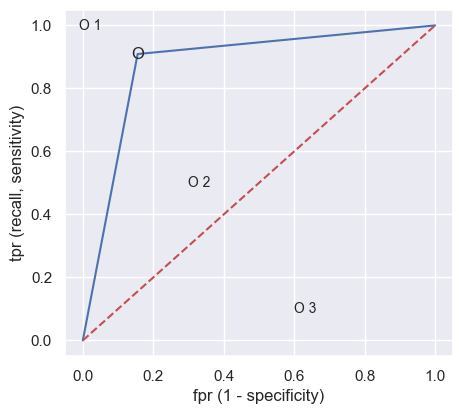

In [28]:
## ROC AUC - part I (binary)
plt.figure(figsize=(5,4.5))
sns.lineplot(x=[0, fpr, 1], y=[0, tpr, 1])
plt.xlabel('fpr (1 - specificity)')
plt.ylabel('tpr (recall, sensitivity)')
ls = np.linspace(0, 1, 100)
plt.plot(ls, ls, color='r', linestyle='--')
plt.annotate('O', (fpr, tpr), ha='center', va='center')
plt.annotate('O 1', (-0.01, 1), ha='left', va='center', size=10)
plt.annotate('O 2', (0.3, 0.5), ha='left', va='center', size=10)
plt.annotate('O 3', (0.6, 0.1), ha='left', va='center', size=10);

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


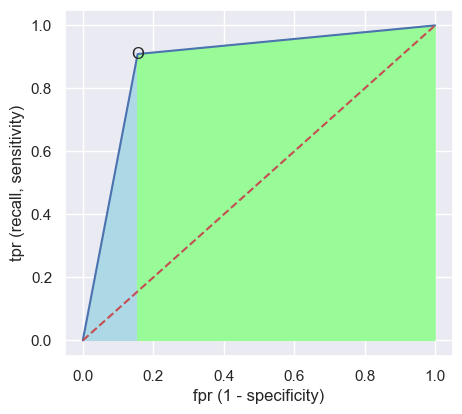

In [29]:
## calculate the area under the curve
plt.figure(figsize=(5,4.5))
sns.lineplot(x=[0, fpr, 1], y=[0, tpr, 1])
plt.xlabel('fpr (1 - specificity)')
plt.ylabel('tpr (recall, sensitivity)')
ls = np.linspace(0, 1, 100)
plt.plot(ls, ls, color='r', linestyle='--')
plt.annotate('O', (fpr, tpr), ha='center', va='center')

## add polygons
x1 = [0, fpr, fpr, 0]
y1 = [0, tpr, 0, 0]
plt.fill(x1, y1, color='lightblue')
x2 = [fpr, fpr, 1, 1, fpr]
y2 = [0, tpr, 1, 0, 0]
plt.fill(x2, y2, color='palegreen');

In [30]:
## calculated from the values of the confusion matrix
print((fpr * tpr / 2) + ((1 - fpr) * ((tpr + 1) / 2)))
print((tpr - fpr + 1) / 2)
print(((tp / (tp + fn)) - (fp / (tn + fp)) + 1) / 2)

0.876764943997148
0.8767649439971479
0.8767649439971479


In [31]:
## with functions from sklearn.metrics
from sklearn.metrics import roc_curve, auc
fpr_arr, tpr_arr, thresholds = roc_curve(y_test_n, y_pred_n)
print(auc(fpr_arr, tpr_arr))

0.8767649439971479


#### Metriken für Wahrscheinlichkeitswerte von Klassen

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


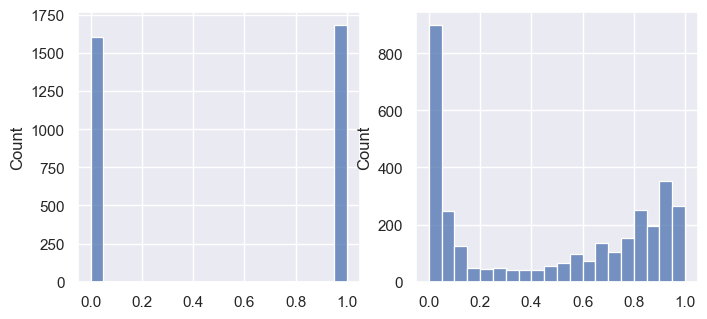

In [33]:
## a graphic comparision of the values from .predict() and .predict_proba()
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3.5), sharex=False)
ax = sns.histplot(y_pred_n, bins=20, ax=axes[0])
ax = sns.histplot(y_pred_p[:,1], bins=20, ax=axes[1]);

In [34]:
## ROC AUC - Part 2 (cont)
print(pd.DataFrame({
    'y_pred_n': y_pred_n,
    'y_pred_p_1': y_pred_p[:, 1]
}).head())

   y_pred_n  y_pred_p_1
0         1        0.92
1         1        0.78
2         1        0.64
3         0        0.01
4         0        0.01


In [35]:
from sklearn.metrics import roc_curve
fpr_arr, tpr_arr, thresholds = roc_curve(y_test_n, y_pred_p[:, 1])
#auc_arr = (tpr_arr - fpr_arr + 1) / 2

results = pd.DataFrame({
    'thresholds' : thresholds,
    'tpr_arr': tpr_arr,
    'fpr_arr': fpr_arr #,
#    'auc_arr': auc_arr
})
print(results.head())
#print(results.tail())

   thresholds   tpr_arr   fpr_arr
0         inf  0.000000  0.000000
1        1.00  0.027706  0.000000
2        0.99  0.064433  0.001729
3        0.98  0.101160  0.002882
4        0.97  0.134665  0.004611


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


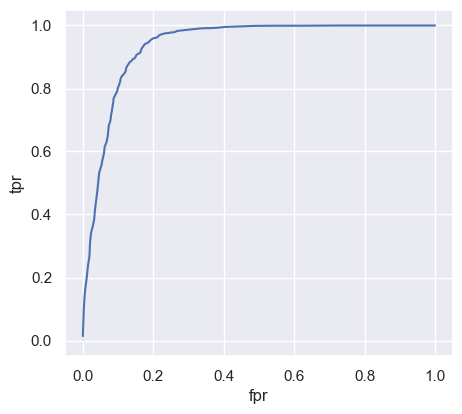

In [36]:
plt.figure(figsize=(5,4.5))
sns.lineplot(x=fpr_arr, y=tpr_arr)
plt.xlabel('fpr')
plt.ylabel('tpr');

In [37]:
from sklearn.metrics import auc
print('auc :', auc(fpr_arr, tpr_arr))

auc : 0.9366306188537984


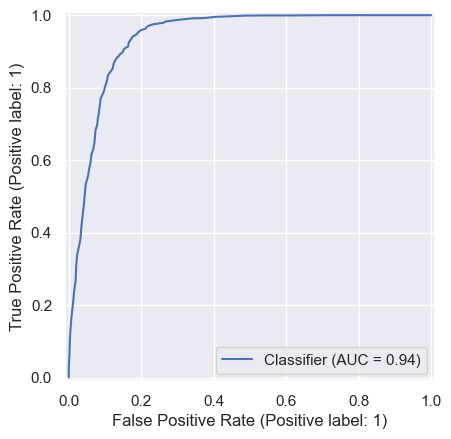

In [38]:
## a function from sklearn.metrics which draws an calculates roc auc directly
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test_n, y_pred_p[:,1]);

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


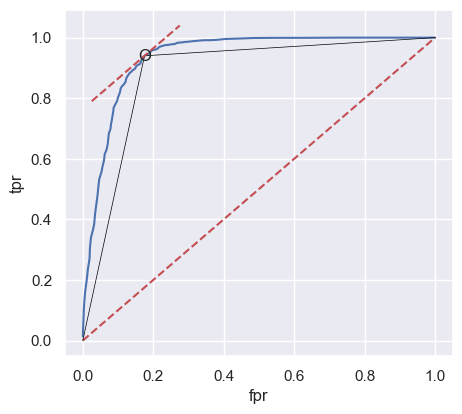

In [39]:
## calc best_fpr and best_tpr
auc_arr = (tpr_arr - fpr_arr + 1) / 2
max_auc = max(auc_arr)
best_tpr = tpr_arr[auc_arr == max(auc_arr)][0]
best_fpr = fpr_arr[auc_arr == max(auc_arr)][0]
best_th = thresholds[auc_arr == max(auc_arr)][0]

plt.figure(figsize=(5,4.5))
sns.lineplot(x=fpr_arr, y=tpr_arr)
plt.xlabel('fpr')
plt.ylabel('tpr')
ls = np.linspace(0, 1, 100)
plt.plot(ls, ls, color='r', linestyle='--')
plt.plot([0, best_fpr], [0, best_tpr], color='black', lw=0.5)
plt.plot([best_fpr, 1], [best_tpr, 1], color='black', lw=0.5)
plt.annotate('O', (best_fpr, best_tpr), ha='center', va='center')
x1 = best_fpr - 0.15
x2 = best_fpr + 0.1
y1 = best_tpr - 0.15
y2 = best_tpr + 0.1
plt.plot([x1, x2], [y1, y2], color='r', linestyle='--');

In [40]:
print('best auc :', max(auc_arr))
print('best threshold :', thresholds[auc_arr == max(auc_arr)][0])

best auc : 0.8824305906295493
best threshold : 0.44


In [41]:
## log_loss
from sklearn.metrics import log_loss
print(log_loss(y_test_n, y_pred_p))

0.304115865220962


In [42]:
## also applicable to multiclass models
## see https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
## example of a multi class classification
iris_data = sns.load_dataset('iris')
iris_X = iris_data.drop('species', axis=1)
iris_y = iris_data['species']
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test, = train_test_split(
    iris_X,
    iris_y,
    train_size=2/3,
    random_state=1234)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1234)
model.fit(iris_X_train, iris_y_train)
iris_y_pred_p = model.predict_proba(iris_X_test)
print(iris_y_pred_p[0:5,:])

#iris_y_pred_p
from sklearn.metrics import log_loss
print(log_loss(iris_y_test, iris_y_pred_p))

[[0.   0.98 0.02]
 [0.   0.98 0.02]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.98 0.02]]
0.10952457826611449


### Performancemetriken - Regression
#### Vorbereitung

In [44]:
## import libraries
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt; sns.set()
%matplotlib inline

## load data
datapath = '../3_data'
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', 'Price', seed = 1234)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
print(pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
}).head())

          y_test     y_pred
18178  3400000.0  1710000.0
16248  3625000.0  2720000.0
7472    565000.0   460000.0
11719  2525000.0  1640000.0
5228   1350000.0  1110000.0


#### Einige Scorer im Überblick

In [47]:
## mean_squared_error (mse)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

168302926887.03622


In [48]:
## root_mean_squared_error (mse)
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y_test, y_pred))

410247.39717277454


In [49]:
## mean_absolute_error (mae)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

242573.75131843635


In [50]:
## mean_absolute_percentage_error (mape)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

0.22293323696477496


In [51]:
## mean_squared_log_error (msle)
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, y_pred))

0.08299968885305599


In [52]:
## median_absolute_error (medae)
from sklearn.metrics import median_absolute_error
print(median_absolute_error(y_test, y_pred))

138000.0


In [53]:
## r2_score (r2)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5788575354456096
